# Handwritten Digit Recognition
- Problem Statement
> In this notebook, we are going to implement a handwritten digit recognition
app using the Neural Network. Also we will build a GUI in which we can draw the digit and with the help of model we will recognize the digit. This is a multiclass classification task where one of n choices is selected. 
- Dataset
> The **MINST** dataset is one of the most popular datasets.The dataset contains images of handwritten digits from 0-9. Hence, there are 10 different classes.

### Importing the Packages

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

The mnist dataset comes with training and test dataset.

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Viewing the variables

In [13]:
print(f"The first element of X_train is {X_train[0]}")

The first element of X_train is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  1

In [6]:
print(f"The first element of y_train is {y_train[0]}")
print(f"The last element of y_train is {y_train[-1]}")

The first element of y_train is 5
The last element of y_train is 8


### Checking the dimesions of the variables

In [10]:
print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of y_train is {y_train.shape}")

The shape of X_train is (60000, 28, 28)
The shape of y_train is (60000,)


### Visualizing the data

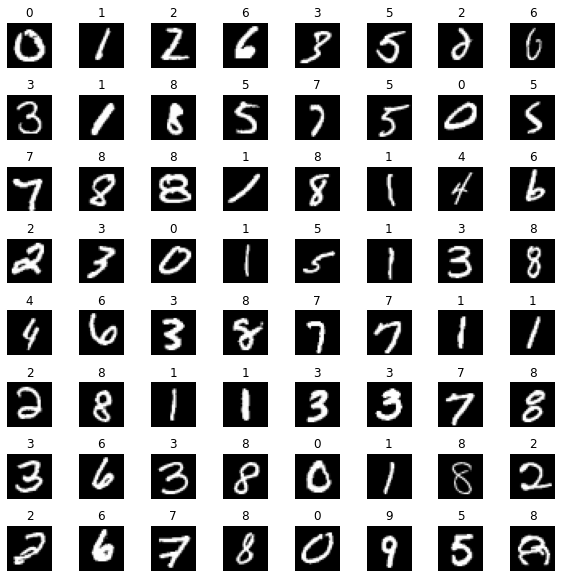

In [23]:
m,n,o = X_train.shape
fig,axes = plt.subplots(8,8,figsize=(8,8))
plt.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    # Select random index 
    random_index = np.random.randint(m)
    ax.imshow(X_train[random_index],cmap="gray")
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

### Neural Network using Tensorflow

In [75]:
X_train.shape

(60000, 28, 28)

In [48]:
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    Dense(units=28,activation="relu"),
    Dense(units=18,activation="relu"),
    Dense(units=10,activation="linear")
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 28)                21980     
                                                                 
 dense_21 (Dense)            (None, 18)                522       
                                                                 
 dense_22 (Dense)            (None, 10)                190       
                                                                 
Total params: 22,692
Trainable params: 22,692
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [51]:
model.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)
model.fit(X_train,y_train,epochs=40)

Epoch 1/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9350
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8201
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6566
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5931
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5583
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5276
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4230
Epoch 8/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3639
Epoch 9/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3356
Epoch 10/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3198
Epoch 11/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3047
Epoch 12/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2885
E

### Making predictions

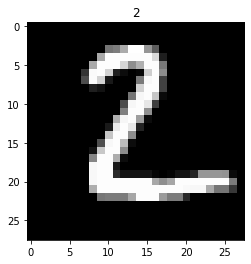

In [80]:
plt.imshow(X_test[1],cmap="gray")
plt.title(y_test[1]);

In [81]:
X_test[1].shape

(28, 28)

### Using softmax activation to calculate probability

In [82]:
prediction_p = tf.nn.softmax(model.predict(X_test[1].reshape(1,28,28)))
print(f"The largest probability is {np.max(prediction_p)}")
print(f"The sum of probability is {np.sum(prediction_p)}")
print(f"The predicted index is {np.argmax(prediction_p)}")

1/1 [==============================] - 0s 32ms/step
The largest probability is 0.9999418258666992
The sum of probability is 1.0
The predicted index is 2


1/1 [==============================] - 0s 29ms/step


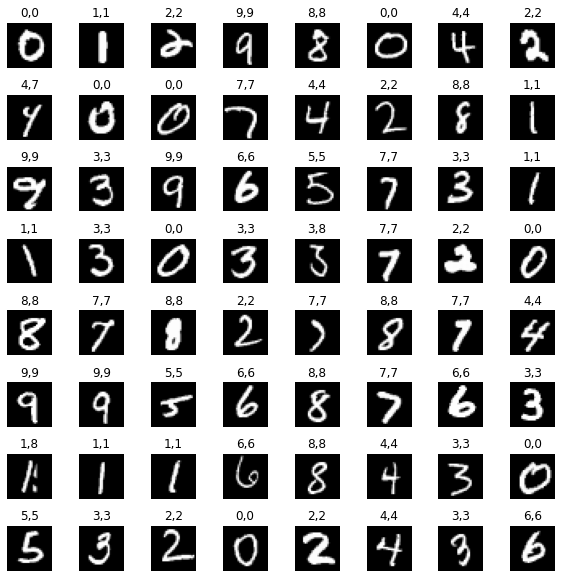

In [91]:
## Testing on more test set
tf.random.set_seed(1234)
m,n,o = X_test.shape
fig,axes = plt.subplots(8,8,figsize=(8,8))
plt.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    # Select random index 
    random_index = np.random.randint(m)
    ax.imshow(X_test[random_index],cmap="gray")
    predicted_label = np.argmax(tf.nn.softmax(model.predict(X_test[random_index])))
    ax.set_title(f"{y_test[random_index]},{predicted_label}")
    ax.set_axis_off()